Multi-Linear Regression
The Second Code in Regression Series Which Is a Refined Form Of Simple Linear Regression
Also This Time Im Using Plotly  Library For Better Visualization,And Doing It After Data Training
The Dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

1-Importing Libraries And Getting Started

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

In [84]:
df=pd.read_csv(r'C:\Users\user\Downloads\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df.shape

(21613, 21)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

All The Datas Are In Int/Float Shape So There's No Need For Data Cleaning

But Some Of The Datas Are Non-Useable Such as Zipcode So We Remove Them From The Dataset

In [87]:
df.drop(['date','id','yr_renovated','zipcode','lat','long'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [88]:
df.shape

(21613, 15)

In [89]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

2-Getting Started With Data Processing And Training

In [90]:
x=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15']]
y=df['price']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [92]:
regr=LinearRegression()

In [93]:
regr.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred=regr.predict(x_test)

In [95]:
#Data training outcome
print("R2-score: %.2f" % r2_score(y_test , y_pred))

R2-score: 0.64


3-Visualization

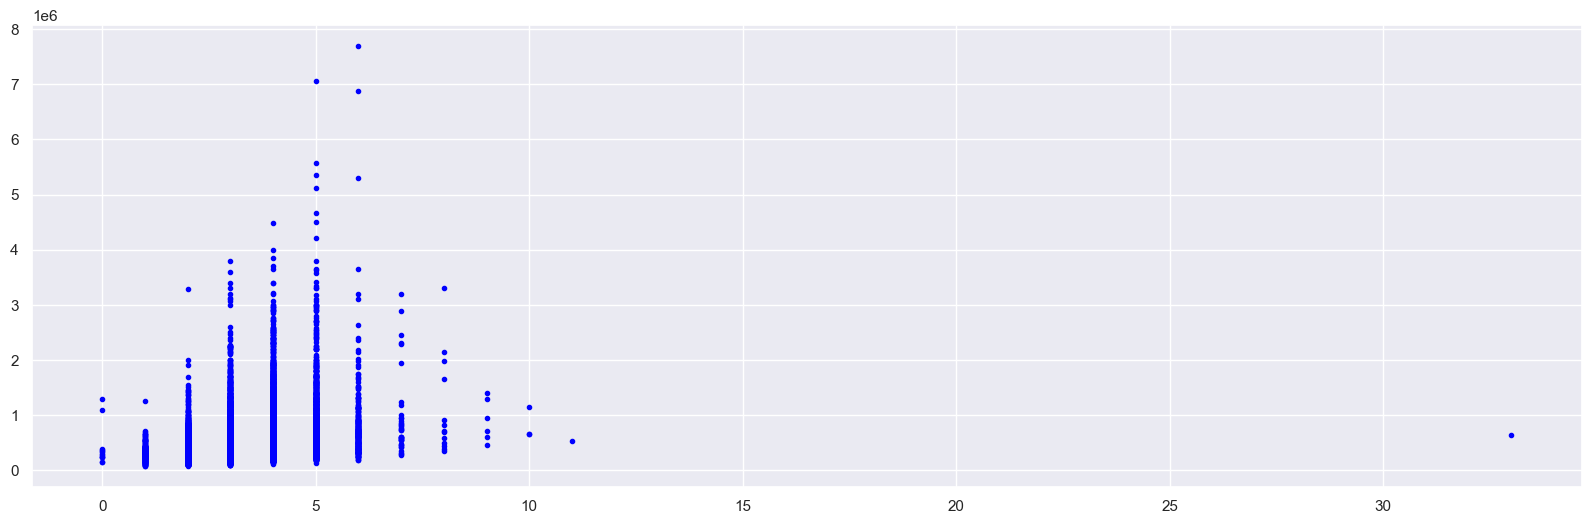

In [96]:
plt.scatter(x.bedrooms,df.price,color='blue',marker= '.')
plt.show()

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

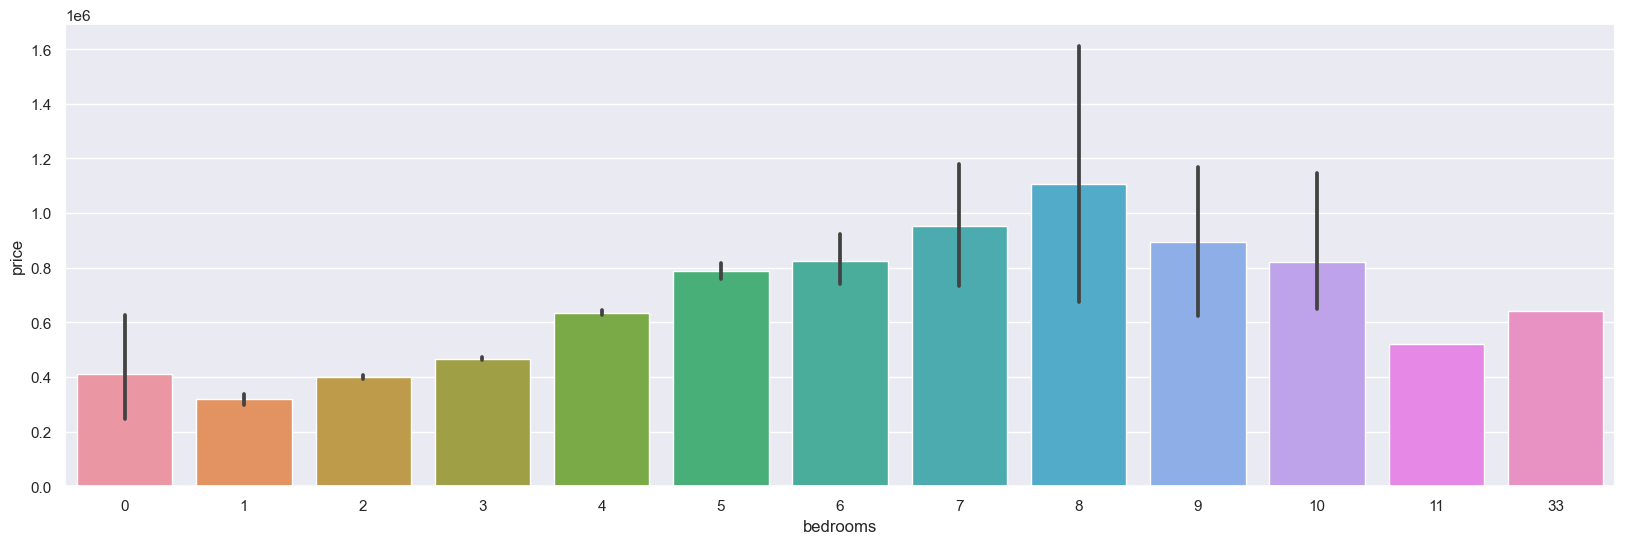

In [97]:
#A better Display with Seaborn library
sns.barplot(x='bedrooms',y='price',data=df)

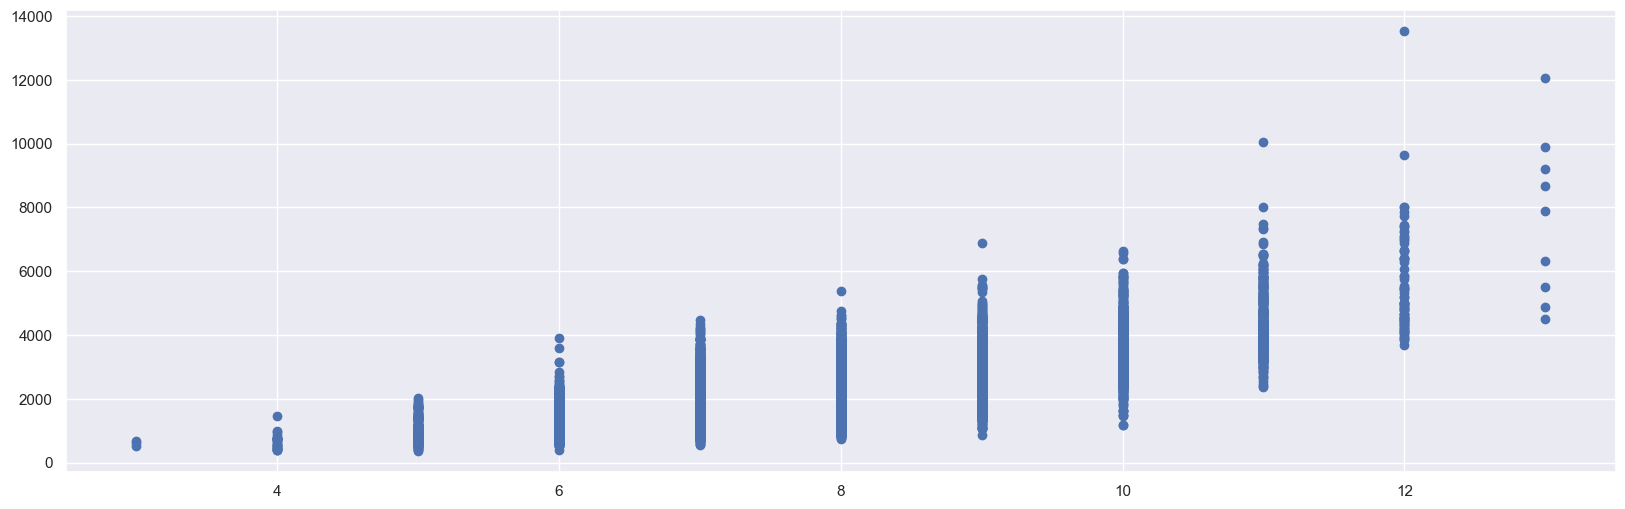

In [98]:
plt.scatter(x_train.grade,x_train.sqft_living)
plt.show()

<AxesSubplot: xlabel='grade', ylabel='sqft_living'>

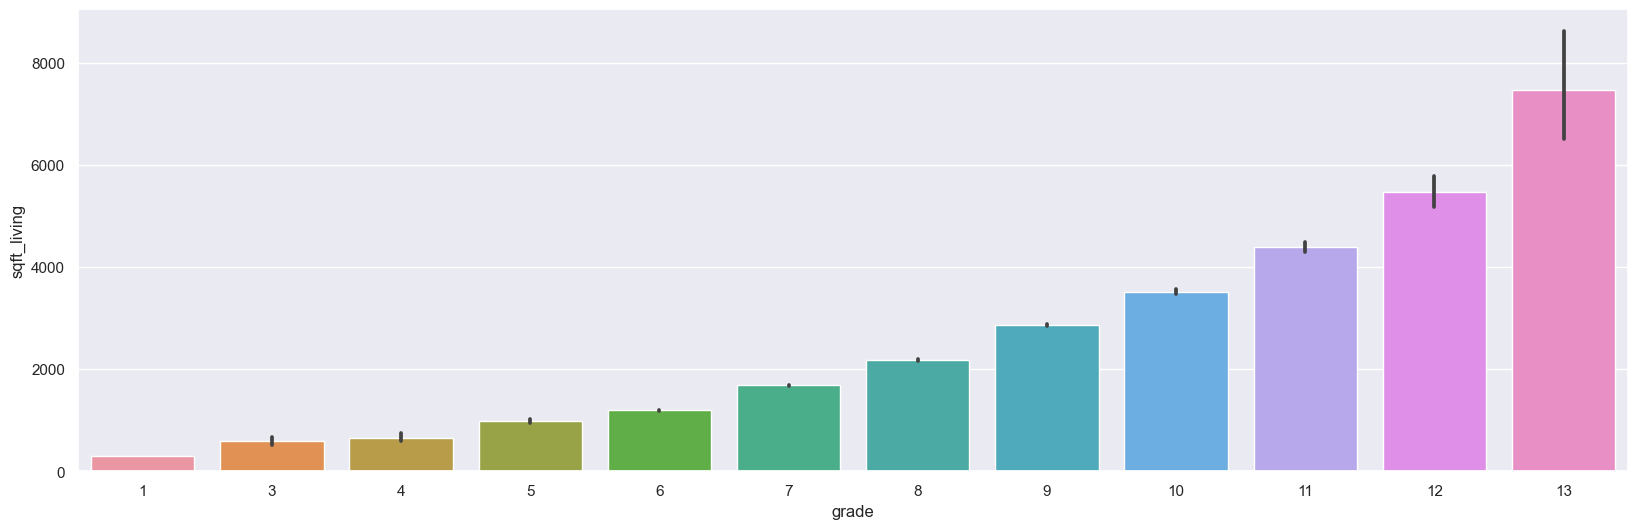

In [99]:
#A better dispaly
sns.barplot(x='grade',y='sqft_living',data=df)

C:\Users\user\AppData\Local\Temp\ipykernel_10604\3104858971.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='yr_built', ylabel='Density'>

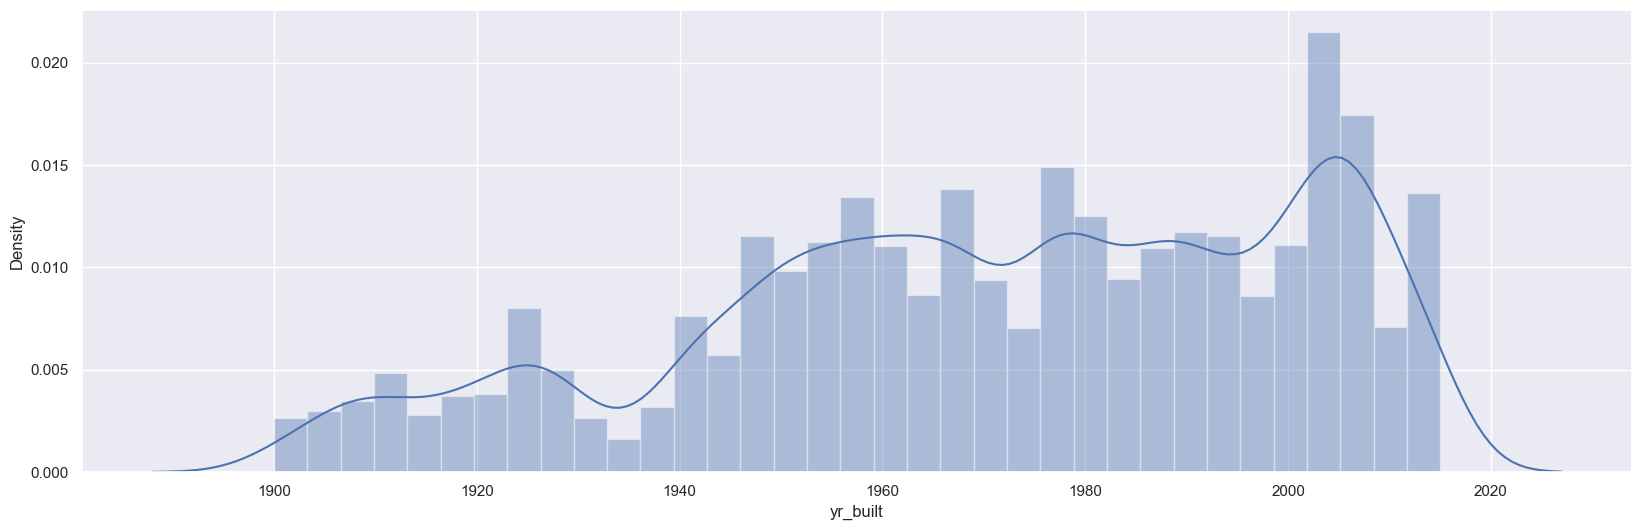

In [100]:
sns.distplot(df['yr_built'])

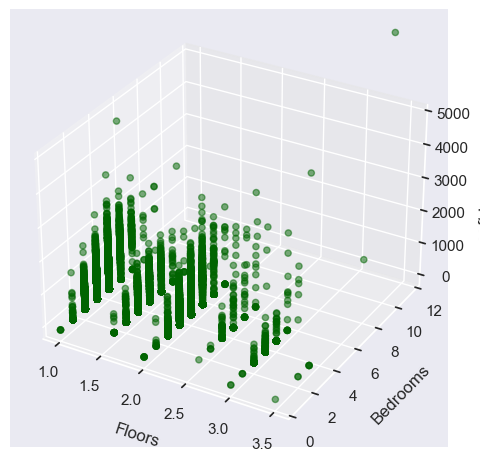

In [101]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_basement'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft basement')
ax.set(ylim=[0,12])
plt.show()

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

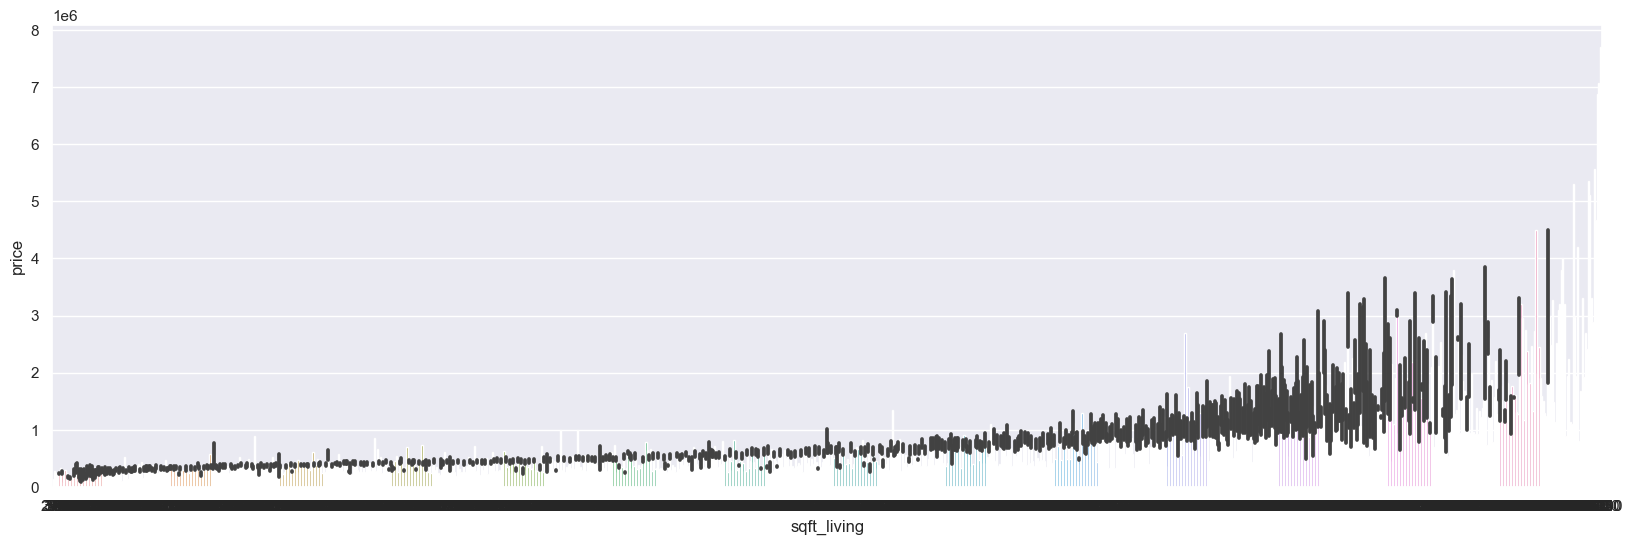

In [102]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='sqft_living',y='price',data=df)

In [103]:
#Drawing the Pie Chart Step1
bedroomsframe = pd.DataFrame({"Bedrooms":df.bedrooms.value_counts().index,"House_bedrooms":df.bedrooms.value_counts().values})
bedroomsframe["Bedrooms"] = bedroomsframe["Bedrooms"].apply(lambda x : "Bedrooms " + str(x))
bedroomsframe.set_index("Bedrooms",inplace=True)

In [104]:
p1 = [go.Pie(labels = bedroomsframe.index,values = bedroomsframe.House_bedrooms,hoverinfo="percent+label+value",hole=0.1,marker=dict(line=dict(color="#000000",width=1)))]
layout = go.Layout(title="Bedrooms Pie Chart")
fig = go.Figure(data=p1,layout=layout)
iplot(fig)

In [105]:
gradeframe = pd.DataFrame({"Grades":df.grade.value_counts().index,"House_Grade":df.grade.value_counts().values})
gradeframe["Grades"] = gradeframe["Grades"].apply(lambda x : "Grade " + str(x))
gradeframe.set_index("Grades",inplace=True)

In [106]:
p1 = [go.Pie(labels = gradeframe.index,values = gradeframe.House_Grade,hoverinfo="percent+label+value",hole=0.1,marker=dict(line=dict(color="#000000",width=2)))]
layout4 = go.Layout(title="Grade Pie Chart")
fig4 = go.Figure(data=p1,layout=layout4)
iplot(fig4)

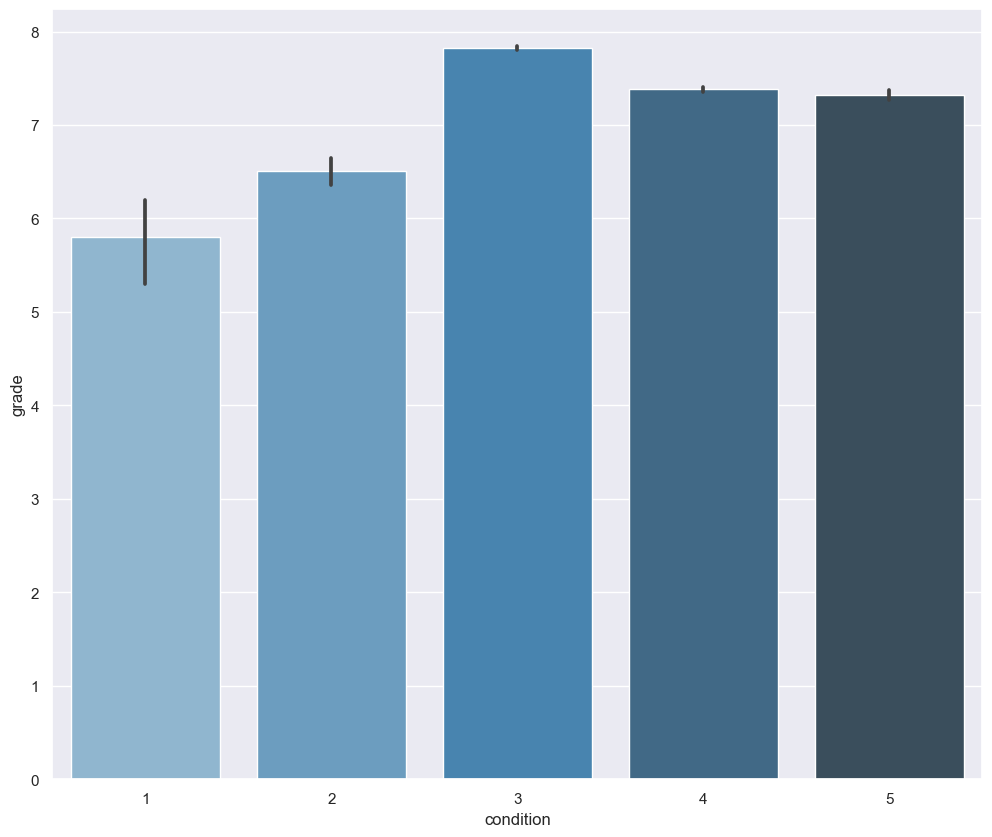

In [107]:
f,(ax1)= plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(x = "condition", y = "grade", data = df, ax = ax1, palette="Blues_d")
plt.show()